In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix
from math import ceil

In [2]:
df = pd.read_csv("/kaggle/input/bengaluru-house-prices/bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [8]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
df['area_type'].value_counts()

area_type
Super built-up  Area    6017
Built-up  Area          1158
Plot  Area               269
Carpet  Area              52
Name: count, dtype: int64

In [10]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-Nov', '17-Oct', '21-Dec', '19-Sep',
       '20-Sep', '18-Mar', '18-Apr', '20-Aug', '19-Mar', '17-Sep',
       '17-Aug', '19-Apr', '22-Dec', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '18-May', '18-Dec', '21-Jun', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '20-Dec', '18-Jun', '16-Mar',
       '22-Jun', '17-Dec', '21-Feb', '19-May', '17-Nov', '20-Oct',
       '20-Jun', '18-Feb', '19-Feb', '21-Oct', '21-Jan', '17-Mar',
       '19-Jun', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '19-Jul', '20-Jan', '21-Sep', '18-Jan', '20-Mar',
       '19-Nov', '15-Jun', '19-Aug', '20-May', '20-Nov', '20-Jul',
       '20-Feb', '15-Dec', '21-Aug', '16-Oct', '22-Nov', '16-Dec',
       '15-Aug', '17-Jan', '16-Nov', '20-Apr', '22-Jan', '16-Jan',
       '17-Feb', '14-Jul'], dtype=object)

In [11]:
label_encoder = LabelEncoder()
df['availability'] = label_encoder.fit_transform(df['availability'].astype(str))
df['society'] = label_encoder.fit_transform(df['society'])

In [12]:
df = pd.get_dummies(df, columns=['area_type'], drop_first=True)

In [13]:
df.head()

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,35,Electronic City Phase II,2 BHK,443,1056,2.0,1.0,39.07,False,False,True
1,73,Chikka Tirupathi,4 Bedroom,2353,2600,5.0,3.0,120.00,False,True,False
3,73,Lingadheeranahalli,3 BHK,2109,1521,3.0,1.0,95.00,False,False,True
5,73,Whitefield,2 BHK,585,1170,2.0,1.0,38.00,False,False,True
11,73,Whitefield,4 Bedroom,1566,2785,5.0,3.0,295.00,False,True,False


In [14]:
df.shape

(7496, 11)

In [15]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df["bhk"].unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7])

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df[~df['total_sqft'].apply(is_float)].head(10)

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
30,35,Yelahanka,4 BHK,1061,2100 - 2850,4.0,0.0,186.000,False,False,True,4
122,28,Hebbal,4 BHK,1796,3067 - 8156,4.0,0.0,477.000,False,False,True,4
137,40,8th Phase JP Nagar,2 BHK,2454,1042 - 1105,2.0,0.0,54.005,False,False,True,2
165,23,Sarjapur,2 BHK,993,1145 - 1340,2.0,0.0,43.490,False,False,True,2
188,73,KR Puram,2 BHK,1100,1015 - 1540,2.0,0.0,56.800,False,False,True,2
549,32,Hennur Road,2 BHK,2035,1195 - 1440,2.0,0.0,63.770,False,False,True,2
661,73,Yelahanka,2 BHK,1675,1120 - 1145,2.0,0.0,48.130,False,False,True,2
672,28,Bettahalsoor,4 Bedroom,2370,3090 - 5002,4.0,0.0,445.000,False,False,False,4
772,47,Banashankari Stage VI,2 BHK,308,1160 - 1195,2.0,0.0,59.935,False,False,True,2
850,68,Bannerghatta Road,2 BHK,1471,1115 - 1130,2.0,0.0,58.935,False,False,True,2


In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [19]:
df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_num)
df = df[df["total_sqft"].notnull()]
df.head(10)

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
0,35,Electronic City Phase II,2 BHK,443,1056.0,2.0,1.0,39.07,False,False,True,2
1,73,Chikka Tirupathi,4 Bedroom,2353,2600.0,5.0,3.0,120.00,False,True,False,4
3,73,Lingadheeranahalli,3 BHK,2109,1521.0,3.0,1.0,95.00,False,False,True,3
5,73,Whitefield,2 BHK,585,1170.0,2.0,1.0,38.00,False,False,True,2
11,73,Whitefield,4 Bedroom,1566,2785.0,5.0,3.0,295.00,False,True,False,4
12,73,7th Phase JP Nagar,2 BHK,2015,1000.0,2.0,1.0,38.00,False,False,True,2
14,73,Sarjapur,3 Bedroom,2075,2250.0,3.0,2.0,148.00,False,True,False,3
15,73,Mysore Road,2 BHK,1543,1175.0,2.0,2.0,73.50,False,False,True,2
16,73,Bisuvanahalli,3 BHK,1523,1180.0,3.0,2.0,48.00,False,False,True,3
17,73,Raja Rajeshwari Nagar,3 BHK,777,1540.0,3.0,3.0,60.00,False,False,True,3


In [20]:
df.loc[30]

availability                             35
location                          Yelahanka
size                                  4 BHK
society                                1061
total_sqft                           2475.0
bath                                    4.0
balcony                                 0.0
price                                 186.0
area_type_Carpet  Area                False
area_type_Plot  Area                  False
area_type_Super built-up  Area         True
bhk                                       4
Name: 30, dtype: object

In [21]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,price_per_sqft
0,35,Electronic City Phase II,2 BHK,443,1056.0,2.0,1.0,39.07,False,False,True,2,3699.810606
1,73,Chikka Tirupathi,4 Bedroom,2353,2600.0,5.0,3.0,120.00,False,True,False,4,4615.384615
3,73,Lingadheeranahalli,3 BHK,2109,1521.0,3.0,1.0,95.00,False,False,True,3,6245.890861
5,73,Whitefield,2 BHK,585,1170.0,2.0,1.0,38.00,False,False,True,2,3247.863248
11,73,Whitefield,4 Bedroom,1566,2785.0,5.0,3.0,295.00,False,True,False,4,10592.459605


In [22]:
df.shape

(7481, 13)

In [23]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

location
Whitefield           397
Sarjapur  Road       310
Electronic City      238
Kanakpura Road       216
Thanisandra          214
                    ... 
1 Giri Nagar           1
Chikkabidarakallu      1
Mailasandra            1
Kattigenahalli         1
Abshot Layout          1
Name: count, Length: 625, dtype: int64

In [24]:
location_stats.values.sum()

7481

In [25]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Arekere                   10
Jalahalli East            10
Amruthahalli              10
Banashankari Stage III    10
Rayasandra                10
                          ..
1 Giri Nagar               1
Chikkabidarakallu          1
Mailasandra                1
Kattigenahalli             1
Abshot Layout              1
Name: count, Length: 482, dtype: int64

In [26]:
len(df.location.unique())

625

In [27]:
df["location"] = df["location"].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df["location"].unique())

144

In [28]:
df.shape

(7481, 13)

In [29]:
df = df[~(df.total_sqft/df.bhk<300)]
df.shape

(7439, 13)

In [30]:
df.price_per_sqft.describe()


count     7439.000000
mean      5851.020195
std       2705.465697
min        371.428571
25%       4283.397683
50%       5319.284802
75%       6693.881632
max      76530.612245
Name: price_per_sqft, dtype: float64

In [31]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(5862, 13)

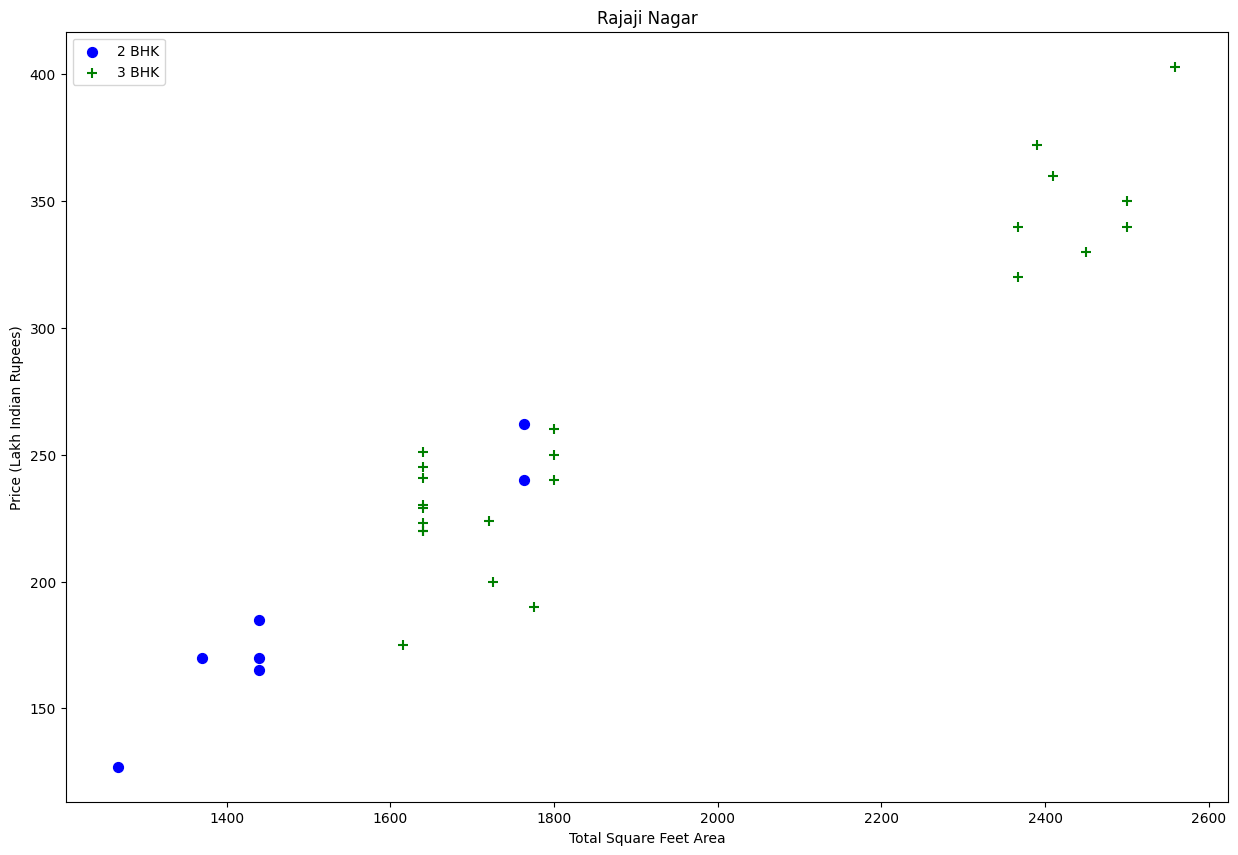

In [32]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

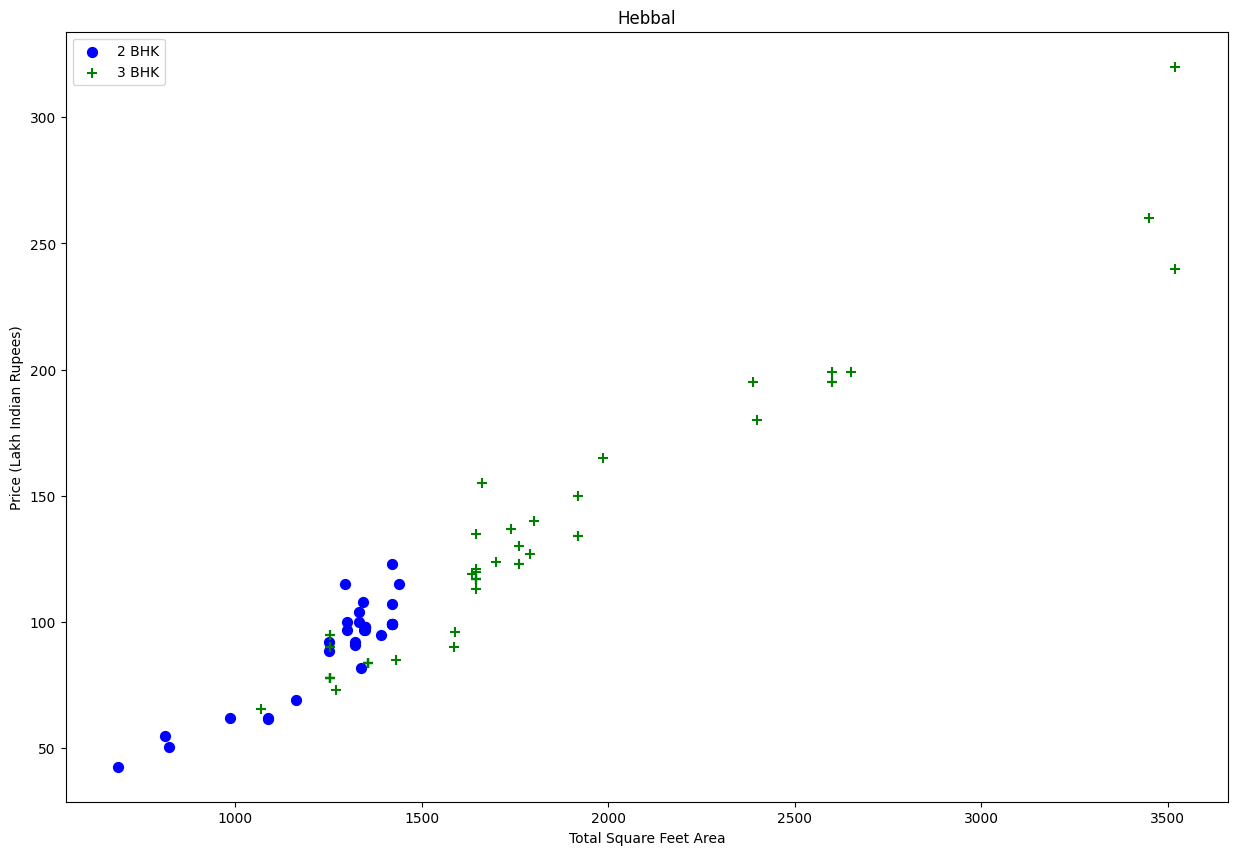

In [33]:
plot_scatter_chart(df,"Hebbal")

In [34]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

(4059, 13)

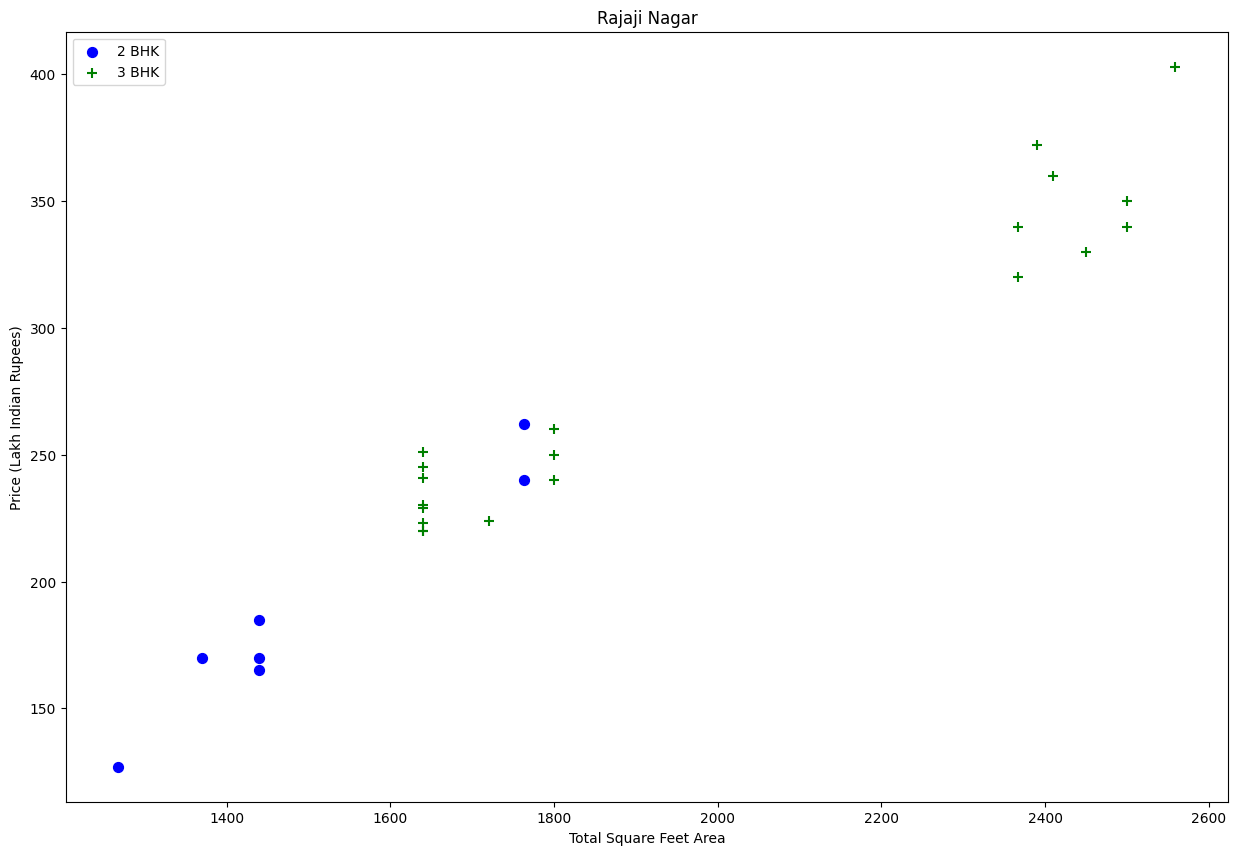

In [35]:
plot_scatter_chart(df,"Rajaji Nagar")

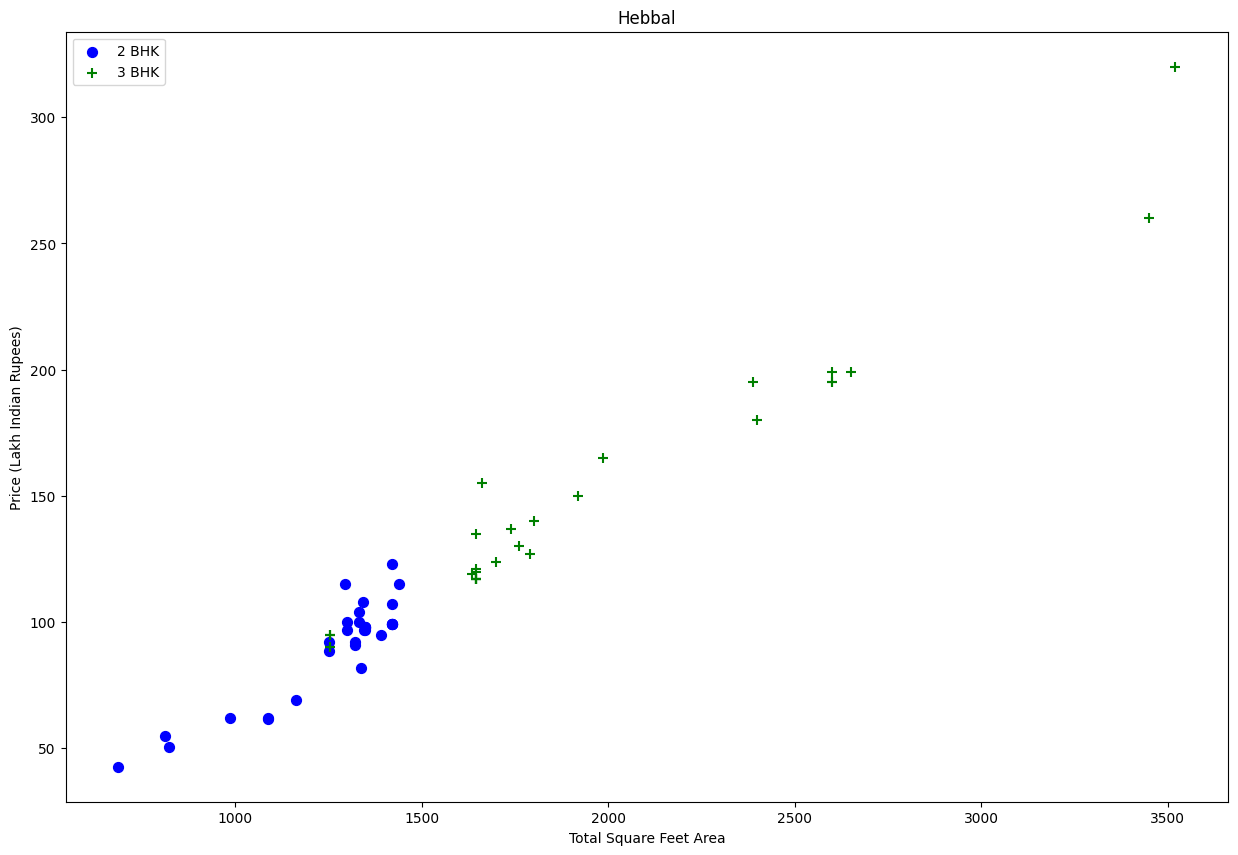

In [36]:
plot_scatter_chart(df,"Hebbal")

Text(0, 0.5, 'Count')

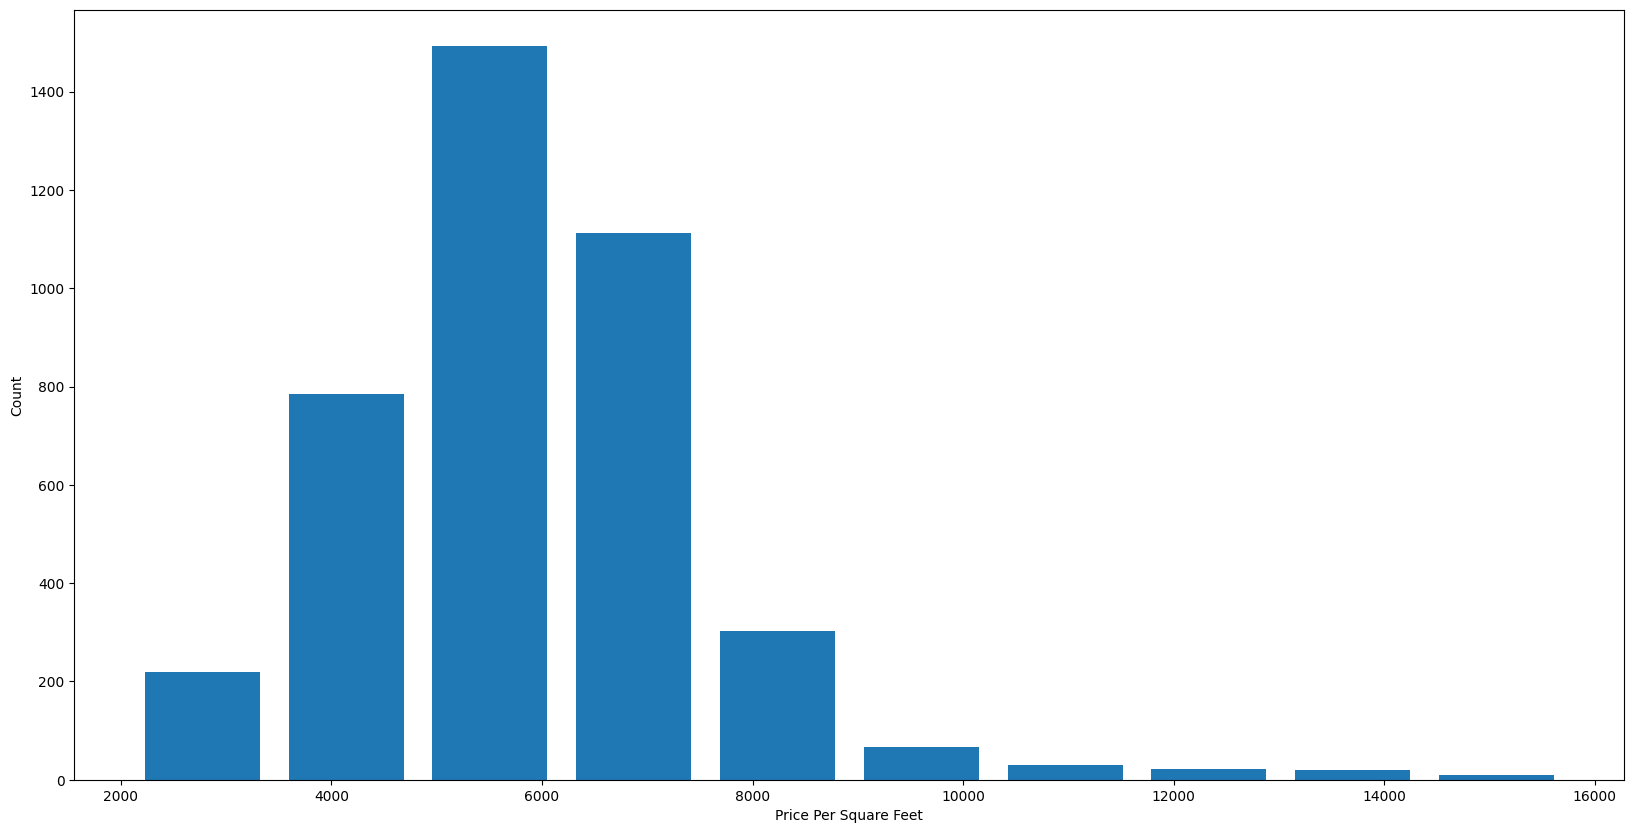

In [37]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [38]:
df.bath.unique()

array([4., 3., 2., 5., 1., 6., 7., 9.])

Text(0, 0.5, 'Count')

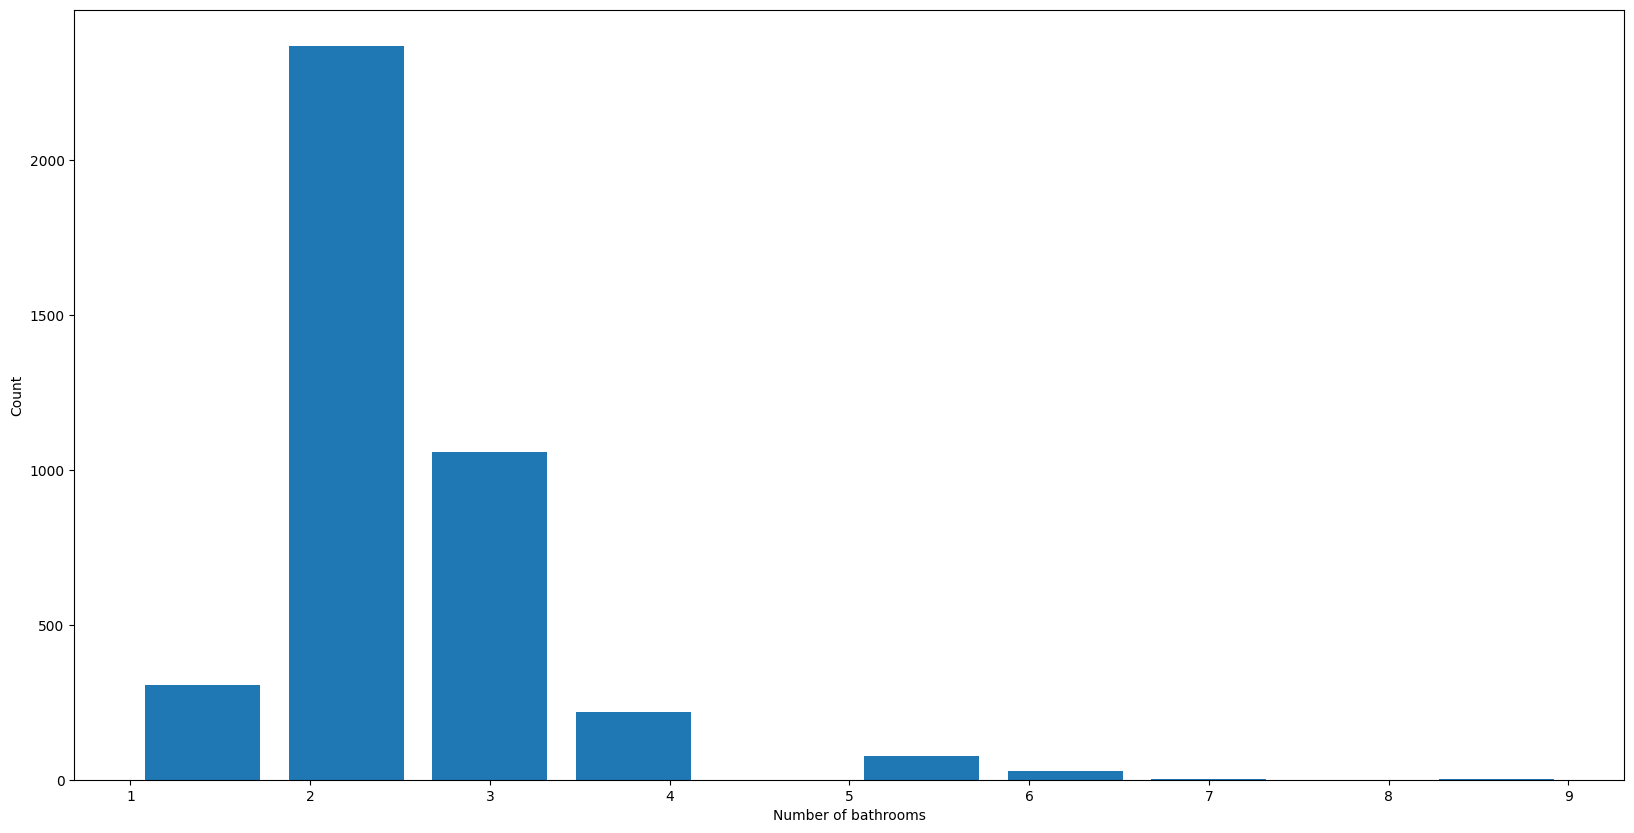

In [39]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [40]:
df[df.bath>10]

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,price_per_sqft


In [41]:
df[df.bath>df.bhk+2]

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,price_per_sqft
3791,73,Thanisandra,3 BHK,2121,1806.0,6.0,2.0,116.0,False,False,True,3,6423.034330
4866,73,other,6 BHK,1562,11338.0,9.0,1.0,1000.0,False,False,True,6,8819.897689


In [42]:
df = df[df.bath<df.bhk+2]
df.shape

(4017, 13)

In [43]:
df.head(2)

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,price_per_sqft
0,73,1st Phase JP Nagar,4 BHK,1499,2825.0,4.0,3.0,250.0,False,False,True,4,8849.557522
1,73,1st Phase JP Nagar,3 BHK,1499,1875.0,3.0,1.0,167.0,False,False,True,3,8906.666667


In [44]:
df = df.drop(['size','price_per_sqft'],axis='columns')
df.head(3)

,availability,location,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
0,73,1st Phase JP Nagar,1499,2825.0,4.0,3.0,250.0,False,False,True,4
1,73,1st Phase JP Nagar,1499,1875.0,3.0,1.0,167.0,False,False,True,3
2,73,1st Phase JP Nagar,1276,1394.0,2.0,1.0,100.0,False,False,True,2


In [45]:
dummies = pd.get_dummies(df.location)
dummies.head(3)

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,availability,location,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,73,1st Phase JP Nagar,1499,2825.0,4.0,3.0,250.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,73,1st Phase JP Nagar,1499,1875.0,3.0,1.0,167.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,73,1st Phase JP Nagar,1276,1394.0,2.0,1.0,100.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,29,1st Phase JP Nagar,870,1077.0,2.0,2.0,93.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,29,1st Phase JP Nagar,870,1590.0,3.0,3.0,131.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df = df.drop('location',axis='columns')
df.head(2)

,availability,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,73,1499,2825.0,4.0,3.0,250.0,False,False,True,4,...,False,False,False,False,False,False,False,False,False,False
1,73,1499,1875.0,3.0,1.0,167.0,False,False,True,3,...,False,False,False,False,False,False,False,False,False,False


In [48]:
corr = df.corrwith(df['price']).sort_values()
corr

Chandapura                 -0.122173
Electronic City Phase II   -0.107304
Raja Rajeshwari Nagar      -0.101917
Attibele                   -0.092200
Uttarahalli                -0.083960
                              ...   
balcony                     0.292014
bhk                         0.668283
bath                        0.717421
total_sqft                  0.895621
price                       1.000000
Length: 153, dtype: float64

In [49]:
correlation_with_target = df.corr()['price']

threshold = 0.05
negative_corr_features = correlation_with_target[correlation_with_target < threshold].index.tolist()

df = df.drop(negative_corr_features, axis=1)

In [50]:
corr = df.corrwith(df['price']).sort_values()
corr

Thigalarapalya          0.058159
1st Phase JP Nagar      0.058771
Ambedkar Nagar          0.059433
Talaghattapura          0.065657
availability            0.068633
Sarjapur  Road          0.075482
Koramangala             0.088404
Old Airport Road        0.099835
Whitefield              0.100918
Hebbal Kempapura        0.104897
Frazer Town             0.120375
Hebbal                  0.136086
Iblur Village           0.149602
Hosakerehalli           0.151704
Kodihalli               0.154365
Malleshwaram            0.198150
Rajaji Nagar            0.267963
area_type_Plot  Area    0.271354
balcony                 0.292014
bhk                     0.668283
bath                    0.717421
total_sqft              0.895621
price                   1.000000
dtype: float64

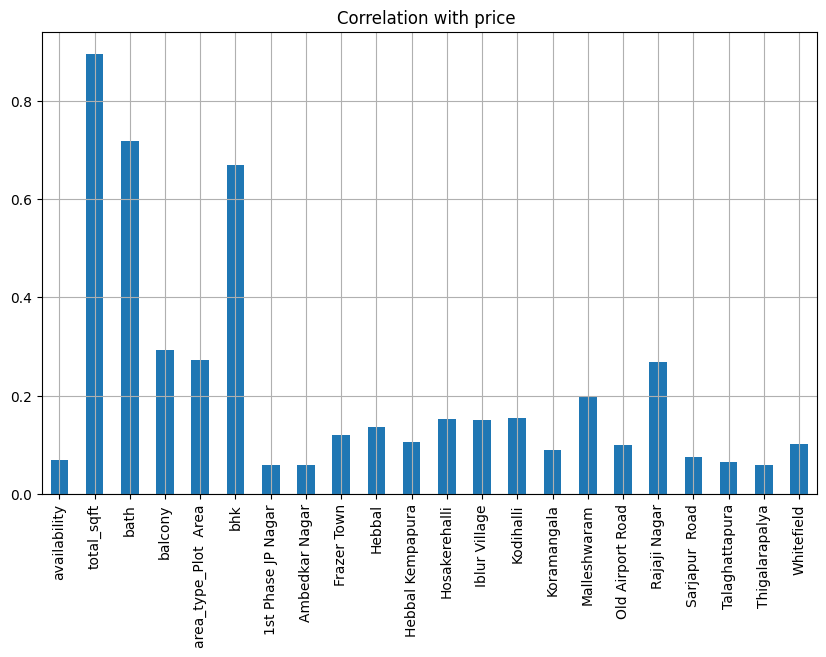

In [51]:
df.drop('price',axis=1).corrwith(df.price).plot(kind='bar',grid=True,figsize=(10,6),title="Correlation with price ")
plt.show()

In [52]:
df.shape

(4017, 23)

In [53]:
X = df.drop(['price'],axis='columns')
X.head(5)

,availability,total_sqft,bath,balcony,area_type_Plot Area,bhk,1st Phase JP Nagar,Ambedkar Nagar,Frazer Town,Hebbal,...,Iblur Village,Kodihalli,Koramangala,Malleshwaram,Old Airport Road,Rajaji Nagar,Sarjapur Road,Talaghattapura,Thigalarapalya,Whitefield
0,73,2825.0,4.0,3.0,False,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,73,1875.0,3.0,1.0,False,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,73,1394.0,2.0,1.0,False,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,29,1077.0,2.0,2.0,False,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,29,1590.0,3.0,3.0,False,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
X.shape

(4017, 22)

In [55]:
y = df.price
y.head(3)

0    250.0
1    167.0
2    100.0
Name: price, dtype: float64

In [56]:
len(y)

4017

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [58]:
def evaluate_regression_model(model, X_test, y_test, threshold=0.5):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')

    r2 = r2_score(y_test, y_pred)
    print(f'R-squared (R2): {r2}')

    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse}')

    y_pred_binary = (y_pred > threshold)
    y_test_binary = (y_test > threshold)

    precision = precision_score(y_test_binary, y_pred_binary)
    print(f'Precision: {precision}')

    recall = recall_score(y_test_binary, y_pred_binary)
    print(f'Recall: {recall}')

    f1 = f1_score(y_test_binary, y_pred_binary)
    print(f'F1 Score: {f1}')

    conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
    print('Confusion Matrix:')
    print(conf_matrix)

    model_score = model.score(X_test, y_test)
    print(f'Model Score: {ceil(model_score * 100)}%')

In [59]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
evaluate_regression_model(lr_clf, X_test, y_test)

Mean Absolute Error (MAE): 12.982078241479908
R-squared (R2): 0.9045201002552865
Mean Squared Error (MSE): 358.6696538961741
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[804]]
Model Score: 91%


In [60]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
evaluate_regression_model(dt_reg, X_test, y_test)

Mean Absolute Error (MAE): 14.449071784299864
R-squared (R2): 0.8318525717454086
Mean Squared Error (MSE): 631.6447760927325
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[804]]
Model Score: 84%


In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
evaluate_regression_model(rf_reg, X_test, y_test)

Mean Absolute Error (MAE): 12.811069950260027
R-squared (R2): 0.8777419179652662
Mean Squared Error (MSE): 459.26173033959344
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[804]]
Model Score: 88%


In [62]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
evaluate_regression_model(gb_reg, X_test, y_test)

Mean Absolute Error (MAE): 12.562743490096894
R-squared (R2): 0.9033304706345754
Mean Squared Error (MSE): 363.1384902215782
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[804]]
Model Score: 91%


In [63]:
from sklearn.linear_model import Ridge

ridge_clf = Ridge(alpha=1.0)
ridge_clf.fit(X_train, y_train)
evaluate_regression_model(ridge_clf, X_test, y_test)

Mean Absolute Error (MAE): 13.040432257266508
R-squared (R2): 0.9027361789271044
Mean Squared Error (MSE): 365.37094335152364
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[804]]
Model Score: 91%


In [64]:
from sklearn.linear_model import Lasso
lasso_clf = Lasso(alpha=1.0)
lasso_clf.fit(X_train, y_train)
evaluate_regression_model(lasso_clf, X_test, y_test)

Mean Absolute Error (MAE): 15.948100348464612
R-squared (R2): 0.800755889629315
Mean Squared Error (MSE): 748.4592704702904
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[804]]
Model Score: 81%


In [65]:
y_pre = gb_reg.predict(X_test)

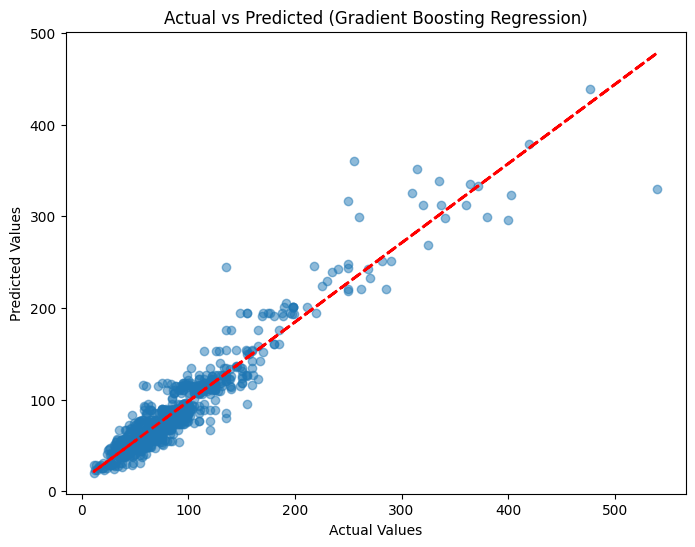

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pre, alpha=0.5)
plt.title('Actual vs Predicted (Gradient Boosting Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

fit_line = np.polyfit(y_test, y_pre, 1)
fit_fn = np.poly1d(fit_line)
plt.plot(y_test, fit_fn(y_test), color='red', linestyle='--', linewidth=2)
plt.show()

In [67]:
import pandas as pd

def predict_price_for_new_data(gb_reg, feature_columns, new_data_point):
    try:
        new_data_point = new_data_point[feature_columns]
        predicted_price = gb_reg.predict(new_data_point)
        print(f'Predicted Price: {predicted_price[0]:.2f} Lakhs')
    except KeyError as e:
        print(f"Error: {e}. Make sure you entered values for all the required features.")

In [68]:
features_used = X_train.columns.tolist()

In [69]:
import random

num_objects = 10
new_data = []

for _ in range(num_objects):
    new_object = {}
    for col in features_used:
        if col == 'area_type_Plot Area':
            new_object[col] = random.randint(0, 1)
        else:
            new_object[col] = random.randint(0, 10) 
            
    new_data.append(new_object)

for i, new_data_point in enumerate(new_data, 1):
    new_data_point_df = pd.DataFrame([new_data_point], columns=features_used)

    predicted_price = gb_reg.predict(new_data_point_df)
    print(f'Predicted Price for Data Point {i}: {predicted_price[0]:.2f} Lakhs')


Predicted Price for Data Point 1: 119.60 Lakhs
Predicted Price for Data Point 2: 158.48 Lakhs
Predicted Price for Data Point 3: 140.84 Lakhs
Predicted Price for Data Point 4: 167.97 Lakhs
Predicted Price for Data Point 5: 189.09 Lakhs
Predicted Price for Data Point 6: 160.60 Lakhs
Predicted Price for Data Point 7: 134.65 Lakhs
Predicted Price for Data Point 8: 201.21 Lakhs
Predicted Price for Data Point 9: 160.68 Lakhs
Predicted Price for Data Point 10: 162.10 Lakhs
